In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
import moviepy.video.io.ImageSequenceClip

In [48]:
# define the input directory
run_dir = '/Users/lbayne/desktop/ms274/model_output/diags'

## Plot a model field at one timestep

In [49]:
delX = 1/625
delY = 19/10000
xgOrigin = -122.2635
ygOrigin = 36.5436
n_rows = 245
n_cols = 300

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY/2, delY)
XC, YC = np.meshgrid(xc, yc)

In [50]:
grid = np.fromfile(os.path.join(run_dir,'BGC_daily_Si',
                                'daily_Si.0000002880.data'), '>f4')
grid = grid.reshape((90,n_rows,n_cols))

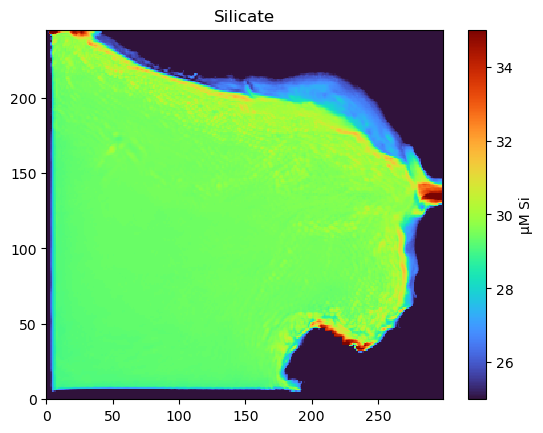

In [51]:
C = plt.pcolormesh(grid[0,:,:-1], cmap='turbo', vmin=25,vmax=35)
plt.colorbar(C, label='µM Si')
plt.title('Silicate')
plt.show()

## Make a timeseries at the CTD cast spot

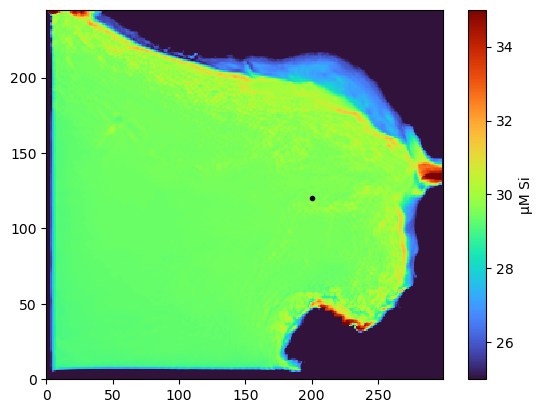

In [62]:
row = 120
col = 200
C = plt.pcolormesh(grid[0,:,:-1], cmap='turbo', vmin=25,vmax=35)
plt.plot(col,row,'k.')
plt.colorbar(C, label='µM Si')
plt.show()

In [42]:
timestep_numbers = []
theta_values = []
for file_name in sorted(os.listdir(os.path.join(run_dir,'BGC_daily_Si'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_numbers.append(int(file_name.split('.')[-2]))

        grid = np.fromfile(os.path.join(run_dir,'BGC_daily_Si',
                                file_name), '>f4')
        grid = grid.reshape((90,n_rows,n_cols))
        theta_values.append(grid[0,row,col])

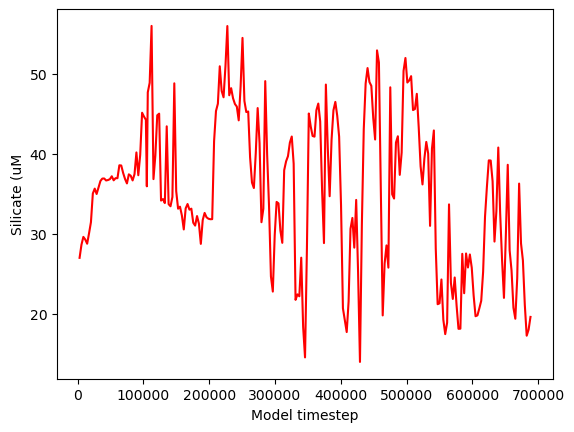

In [54]:
plt.plot(timestep_numbers, theta_values,'r-')
plt.ylabel('Silicate (uM')
plt.xlabel('Model timestep')
plt.savefig('/Users/lbayne/desktop/ms274/model_output/Si_timeseries.png', dpi=300)

plt.show()

## Make a movie

In [9]:
plot_dir = '/Users/lbayne/desktop/ms274/model_output/plots'

In [21]:
def plot_panel(run_dir, plot_dir, file_name):

    # read in the data
    grid = np.fromfile(os.path.join(run_dir,'BGC_daily_Si',
                                file_name), '>f4')
    grid = grid.reshape((90,n_rows,n_cols))
    timestep_number = int(file_name.split('.')[-2])

    # make a figure 
    fig = plt.figure(figsize=(7,8))
    gs1 = GridSpec(11, 10, left=0.1, right=0.98, bottom=0.06, top=0.95, hspace=0.05)

    # plot the temperature
    ax1 = fig.add_subplot(gs1[:-2, :])
    C = ax1.pcolormesh(XC[:,:-1], YC[:,:-1], grid[0,:,:-1], cmap='turbo', vmin=15, vmax=45)
    plt.colorbar(C, label='Silicate (uM')

    # # plot the land in grey
    # land = (grid[0,:,:-1]==0).astype(int)
    # print(np.min(land), np.max(land))
    # land = np.ma.masked_where(land, land==0)
    # print(land)
    # ax1.pcolormesh(XC[:,:-1], YC[:,:-1], land, cmap='Greys')#, vmin=-1, vmax=1)
    
    # format the axes
    plt.title('Silicate Flux in Monterey Bay')
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')

    max_timestep_number = int(366*24*60*60/300)
    ax2 = fig.add_subplot(gs1[-1, :-2])
    rect = Rectangle((0,0),timestep_number, 1, facecolor='grey', edgecolor='k')
    ax2.add_patch(rect)
    ax2.set_xlim([0, max_timestep_number])
    ax2.set_ylim([0, 1])
    ax2.set_xticks([0,max_timestep_number])
    ax2.set_xticklabels([2008,2009])
    ax2.set_yticklabels([])
    ax2.set_xlabel('Time')
    
    output_file = os.path.join(plot_dir,'panels_Si',file_name[:-5]+'.png')
    plt.savefig(output_file, facecolor='white')
    plt.close(fig)


# test the function
#plot_panel(run_dir, plot_dir, 'daily_Si.0000002880.data')

In [22]:
for file_name in sorted(os.listdir(os.path.join(run_dir,'BGC_daily_Si'))):
    if file_name[-4:]=='data':
        plot_panel(run_dir, plot_dir, file_name)

In [23]:
panel_list = []
for file_name in sorted(os.listdir(os.path.join(plot_dir,'panels_Si'))):
    if file_name[-4:]=='.png':
        panel_list.append(os.path.join(plot_dir,'panels_Si',file_name))

In [24]:
# set the frames per second
fps=4

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(panel_list, fps=fps)

# write the video to a file
clip.write_videofile(os.path.join(plot_dir,'Si.mp4'))

Moviepy - Building video /Users/lbayne/desktop/ms274/model_output/plots/Si.mp4.
Moviepy - Writing video /Users/lbayne/desktop/ms274/model_output/plots/Si.mp4



Moviepy - Done !
Moviepy - video ready /Users/lbayne/desktop/ms274/model_output/plots/Si.mp4
